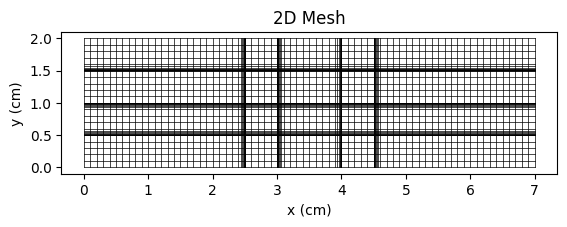

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def make_2D(x_edges, y_edges):
    """
    @brief   Sets up mesh.

    @details Sets up fixed spatial mesh.
    @return  None

    Mesh creation
    =============

    The overall problem size and number of mesh cells are specified as user
    input, and the cell size ($dx$) is calculated from these.

    Arrays of both the cell-centre and the cell-edge (node) positions are
    created.

    Cell-centred arrays for temperature, initial temperature, opacity, and total energy deposited, are initialised.
    """
    x_edges = np.asarray(x_edges)
    y_edges = np.asarray(y_edges)

    dx = np.diff(x_edges)
    dy = np.diff(y_edges)

    x_centers = 0.5 * (x_edges[:-1] + x_edges[1:])
    y_centers = 0.5 * (y_edges[:-1] + y_edges[1:])

    Nx = len(dx)
    Ny = len(dy)

    # Meshgrid of cell centers
    xcoord, ycoord = np.meshgrid(x_centers, y_centers, indexing='ij') # shape (Nx, Ny)

    return x_edges, y_edges, dx, dy, x_centers, y_centers, Nx, Ny, xcoord, ycoord

x_edges = [0.00000, 1.00000e-01, 2.00000e-01, 3.00000e-01, 4.00000e-01, 
           5.00000e-01, 6.00000e-01, 7.00000e-01, 8.00000e-01, 9.00000e-01, 
           1.00000, 1.10000, 1.20000, 1.30000, 1.40000,
           1.50000, 1.60000, 1.70000, 1.80000, 1.90000, 
           2.00000, 2.10000, 2.20000, 2.30000, 2.40000,
           2.43283, 2.45511, 2.47022, 2.48048, 2.48743, 
           2.49215, 2.49535, 2.49753, 2.49900, 2.50000, 
           2.60000, 2.70000, 2.80000, 2.90000, 3.00000, 
           3.00100, 3.00247, 3.00465, 3.00785, 3.01257, 
           3.01952, 3.02978, 3.04489, 3.06717, 3.10000, 
           3.20000, 3.30000, 3.40000, 3.50000, 3.60000, 
           3.70000, 3.80000, 3.90000, 3.93283, 3.95511, 
           3.97022, 3.98048, 3.98743, 3.99215, 3.99535, 
           3.99753, 3.99900, 4.00000, 4.10000, 4.20000, 
           4.30000, 4.40000, 4.50000, 4.50100, 4.50247, 
           4.50465, 4.50785, 4.51257, 4.51952, 4.52978, 
           4.54489, 4.56717, 4.60000, 4.70000, 4.80000, 
           4.90000, 5.00000, 5.10000, 5.20000, 5.30000, 
           5.40000, 5.50000, 5.60000, 5.70000, 5.80000, 
           5.90000, 6.00000, 6.10000, 6.20000, 6.30000, 
           6.40000, 6.50000, 6.60000, 6.70000, 6.80000, 
           6.90000, 7.00000]

y_edges = [0.00000, 1.00000e-01, 2.00000e-01, 3.00000e-01, 4.00000e-01, 
           5.00000e-01, 5.01000e-01, 5.02474e-01, 5.04646e-01, 5.07849e-01,
           5.12568e-01, 5.19525e-01, 5.29778e-01, 5.44891e-01, 5.67167e-01,
           6.00000e-01, 7.00000e-01, 8.00000e-01, 9.00000e-01, 9.32833e-01, 
           9.55109e-01, 9.70222e-01, 9.80475e-01, 9.87432e-01, 9.92151e-01,
           9.95354e-01, 9.97526e-01, 9.99000e-01, 1.00000, 1.10000, 
           1.20000, 1.30000, 1.40000, 1.50000, 1.50100, 
           1.50247, 1.50465, 1.50785, 1.51257, 1.51952, 
           1.52978, 1.54489, 1.56717, 1.60000, 1.70000, 
           1.80000, 1.90000, 2.00000]

x_edges, y_edges, dx, dy, x_centers, y_centers, Nx, Ny, xcoord, ycoord = make_2D(x_edges, y_edges)

def plot_mesh_with_centers(x_edges, y_edges):
    fig, ax = plt.subplots()

    # Grid lines
    for x in x_edges:
        ax.plot([x, x], [y_edges[0], y_edges[-1]], color='black', linewidth=0.5)
    for y in y_edges:
        ax.plot([x_edges[0], x_edges[-1]], [y, y], color='black', linewidth=0.5)

    # Cell centers
    # ax.plot(xcoord.flatten(), ycoord.flatten(), 'ro')
    ax.set_aspect('equal')
    ax.set_xlabel("x (cm)")
    ax.set_ylabel("y (cm)")
    ax.set_title("2D Mesh")
    plt.grid(False)
    plt.show()

plot_mesh_with_centers(x_edges, y_edges)


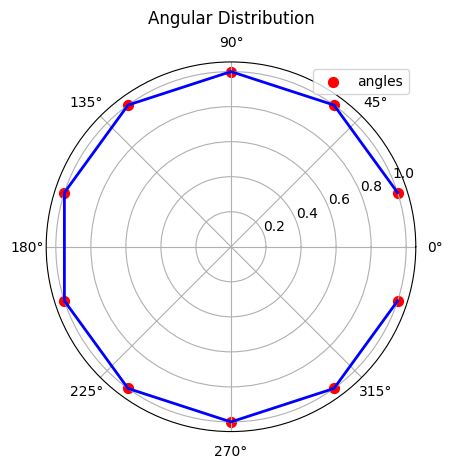

DPT average = 3.141592653589793
MC average = 3.141353716222066


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

nmu_cell = 10
angles = (np.arange(nmu_cell) + 0.5) / nmu_cell * 2.0 * np.pi

radii = np.ones_like(angles)

fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")

# scatter points on the unit circle
ax.scatter(angles, radii, c="r", s=50, label="angles")

# or plot as line connecting points
ax.plot(angles, radii, "b-", lw=2)

ax.set_title("Angular Distribution", va="bottom")
ax.legend()
plt.show()

average = np.average(angles)
print(f'DPT average = {average}')

theta = np.random.uniform(0.0, 2.0*np.pi)
N=1000000
mc = np.zeros(N) 
for i in range(len(mc)):
    mc[i] = np.random.uniform(0.0, 2.0*np.pi)

average_mc = np.average(mc)
print(f'MC average = {average_mc}')